## FastAI DenseNet for Skin Cancer Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64 # dependent on GPU in use

## Obtaining the Dataset

In [4]:
from pathlib import Path

In [5]:
path = Path('./data')

In [18]:
#! kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p "{path}"
#! unzip "{path}/skin-cancer-malignant-vs-benign.zip" -d "{path}"

## Pre-process/Viz

In [24]:
path_train = path/'train'
path_test = path/'test'

In [25]:
tfms = get_transforms(flip_vert=True, max_warp=0.1)

In [26]:
data = ImageDataBunch.from_folder(path, train="/train", valid_pct=0.2,
                                  ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

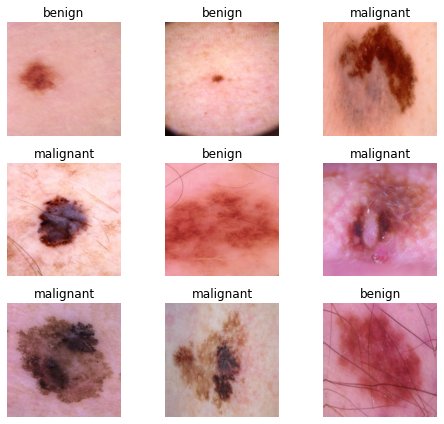

In [27]:
data.show_batch(rows=3,figsize=(7,6))

## First DenseNet 121 Attempt

In [28]:
learn = cnn_learner(data, models.densenet121, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/jupyter/.cache/torch/checkpoints/densenet121-a639ec97.pth


In [30]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


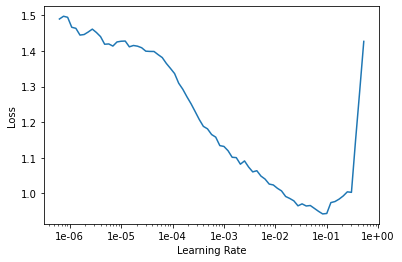

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.517371,0.343095,0.148710,00:30
1,0.345261,0.942237,0.213202,00:29
2,0.299453,0.194136,0.087253,00:29
3,0.230623,0.167717,0.072838,00:29
4,0.200093,0.206606,0.091047,00:29
5,0.155102,0.142849,0.059181,00:29


In [34]:
learn.save('stage-1-dn-121')

In [35]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


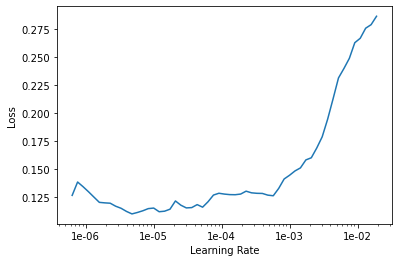

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.144966,0.187139,0.075114,00:36
1,0.174656,0.186199,0.088771,00:36
2,0.155215,0.168161,0.074355,00:36
3,0.120792,0.115639,0.052352,00:36
4,0.098043,0.120039,0.044006,00:36


In [38]:
learn.save('stage-2-dn121-96')